# **Enhancing Object Detection in YOLOS-Small through Advanced LoRA Methods**


# NOTE: This file is intended for DISPLAY PURPOSES ONLY and will NOT run independently.  
For full execution, please refer to the complete script:  


```
Enhancing_YOLOS_S_through_Advanced_LoRA_Methods.py
```


This file contains extracted sections to showcase outputs in GitHub.


## **6. Implementing LoRA Variants**


### **(d) LoKr- Low Rank Kronecker Product**

#### **LoKrConfig**


In [ ]:
# Define model for LoKr
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_for_LoKr = YolosForObjectDetection.from_pretrained(model_name).to(device)

lokr_config = LoKrConfig(
    r=8,
    alpha=16,
    rank_dropout=0.3,
    module_dropout=0.1,
    use_effective_conv2d=True,
    decompose_both=True,
    decompose_factor=8,
    target_modules=target_modules
)

# Apply LoKr to the model
model_with_LoKr = get_peft_model(model_for_LoKr, lokr_config)
model_with_LoKr.print_trainable_parameters()

trainable params: 19,968 || all params: 30,704,736 || trainable%: 0.0650


In [ ]:
# Inspect LoKr Layers
for name, param in model_with_LoKr.named_parameters():
    print(f"{name} - requires_grad: {param.requires_grad}")

for name, param in model_with_LoKr.named_parameters():
    if "lokr" in name:
        print(name, param.shape)


base_model.model.vit.embeddings.cls_token - requires_grad: False
base_model.model.vit.embeddings.detection_tokens - requires_grad: False
base_model.model.vit.embeddings.position_embeddings - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.weight - requires_grad: False
base_model.model.vit.embeddings.patch_embeddings.projection.bias - requires_grad: False
base_model.model.vit.encoder.mid_position_embeddings - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.weight - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.base_layer.bias - requires_grad: False
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w1.default - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w2_a.default - requires_grad: True
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w2_b.default - requires_grad: True
base_model.model.vit.

In [ ]:
# Mean value of LoKr layers before training
for name, param in model_with_LoKr.named_parameters():
    if "lokr" in name:
        print(f"{name} mean after training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w1.default mean after training: 0.000000
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w2_a.default mean after training: -0.020643
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w2_b.default mean after training: -0.002195
base_model.model.vit.encoder.layer.0.attention.attention.value.lokr_w1.default mean after training: 0.000000
base_model.model.vit.encoder.layer.0.attention.attention.value.lokr_w2_a.default mean after training: -0.002571
base_model.model.vit.encoder.layer.0.attention.attention.value.lokr_w2_b.default mean after training: 0.004130
base_model.model.vit.encoder.layer.1.attention.attention.query.lokr_w1.default mean after training: 0.000000
base_model.model.vit.encoder.layer.1.attention.attention.query.lokr_w2_a.default mean after training: 0.004395
base_model.model.vit.encoder.layer.1.attention.attention.query.lokr_w2_b.default mean after training: -0.004493
bas

In [ ]:
lokr_total_parameters = [p for p in model_with_LoKr.parameters()]
print(f"Number of LoKr parameter tensors: {len(lokr_total_parameters)}")

lokr_parameters = [p for p in model_with_LoKr.parameters() if p.requires_grad]
print(f"Number of LoKr trainable parameter tensors (requires_grad=True): {len(lokr_parameters)}")


Number of LoKr parameter tensors: 284
Number of LoKr trainable parameter tensors (requires_grad=True): 72


#### **Train Model with LoKr**

  0%|          | 1/368 [00:07<44:39,  7.30s/it]

Epoch 1, Batch 0: Loss = 1.2390


  3%|▎         | 11/368 [00:45<20:32,  3.45s/it]

Epoch 1, Batch 10: Loss = 0.6350


  6%|▌         | 21/368 [01:32<26:34,  4.60s/it]

Epoch 1, Batch 20: Loss = 1.1502


  8%|▊         | 31/368 [02:14<23:09,  4.12s/it]

Epoch 1, Batch 30: Loss = 1.0592


 11%|█         | 41/368 [02:52<18:51,  3.46s/it]

Epoch 1, Batch 40: Loss = 0.9540


 14%|█▍        | 51/368 [03:36<23:45,  4.50s/it]

Epoch 1, Batch 50: Loss = 1.0465


 17%|█▋        | 61/368 [04:19<22:12,  4.34s/it]

Epoch 1, Batch 60: Loss = 1.1187


 19%|█▉        | 71/368 [05:02<20:54,  4.22s/it]

Epoch 1, Batch 70: Loss = 1.1760


 22%|██▏       | 81/368 [05:41<17:34,  3.67s/it]

Epoch 1, Batch 80: Loss = 0.9538


 25%|██▍       | 91/368 [06:22<19:43,  4.27s/it]

Epoch 1, Batch 90: Loss = 1.4404


 27%|██▋       | 101/368 [07:05<16:48,  3.78s/it]

Epoch 1, Batch 100: Loss = 1.1544


 30%|███       | 111/368 [07:46<18:15,  4.26s/it]

Epoch 1, Batch 110: Loss = 0.9549


 33%|███▎      | 121/368 [08:31<17:02,  4.14s/it]

Epoch 1, Batch 120: Loss = 1.3376


 36%|███▌      | 131/368 [09:20<18:37,  4.72s/it]

Epoch 1, Batch 130: Loss = 1.0689


 38%|███▊      | 141/368 [10:00<15:27,  4.09s/it]

Epoch 1, Batch 140: Loss = 1.1767


 41%|████      | 151/368 [10:37<15:22,  4.25s/it]

Epoch 1, Batch 150: Loss = 0.8167


 44%|████▍     | 161/368 [11:19<15:02,  4.36s/it]

Epoch 1, Batch 160: Loss = 1.1012


 46%|████▋     | 171/368 [12:02<15:11,  4.62s/it]

Epoch 1, Batch 170: Loss = 1.0531


 49%|████▉     | 181/368 [12:47<14:18,  4.59s/it]

Epoch 1, Batch 180: Loss = 0.8947


 52%|█████▏    | 191/368 [13:30<12:17,  4.17s/it]

Epoch 1, Batch 190: Loss = 1.0818


 55%|█████▍    | 201/368 [14:12<12:35,  4.53s/it]

Epoch 1, Batch 200: Loss = 1.0389


 57%|█████▋    | 211/368 [14:54<10:07,  3.87s/it]

Epoch 1, Batch 210: Loss = 1.1325


 60%|██████    | 221/368 [15:37<10:11,  4.16s/it]

Epoch 1, Batch 220: Loss = 0.9343


 63%|██████▎   | 231/368 [16:26<10:45,  4.71s/it]

Epoch 1, Batch 230: Loss = 1.2623


 65%|██████▌   | 241/368 [17:08<09:52,  4.66s/it]

Epoch 1, Batch 240: Loss = 1.0227


 68%|██████▊   | 251/368 [17:52<08:31,  4.37s/it]

Epoch 1, Batch 250: Loss = 1.1137


 71%|███████   | 261/368 [18:32<07:11,  4.03s/it]

Epoch 1, Batch 260: Loss = 1.0096


 74%|███████▎  | 271/368 [19:16<06:27,  3.99s/it]

Epoch 1, Batch 270: Loss = 1.0571


 76%|███████▋  | 281/368 [19:56<05:15,  3.63s/it]

Epoch 1, Batch 280: Loss = 1.6198


 79%|███████▉  | 291/368 [20:39<05:34,  4.34s/it]

Epoch 1, Batch 290: Loss = 1.0208


 82%|████████▏ | 301/368 [21:26<06:00,  5.37s/it]

Epoch 1, Batch 300: Loss = 1.0317


 85%|████████▍ | 311/368 [22:10<04:20,  4.57s/it]

Epoch 1, Batch 310: Loss = 1.0331


 87%|████████▋ | 321/368 [22:53<03:07,  3.99s/it]

Epoch 1, Batch 320: Loss = 1.0793


 90%|████████▉ | 331/368 [23:35<02:26,  3.96s/it]

Epoch 1, Batch 330: Loss = 1.2110


 93%|█████████▎| 341/368 [24:14<01:44,  3.86s/it]

Epoch 1, Batch 340: Loss = 0.9755


 95%|█████████▌| 351/368 [25:02<01:15,  4.46s/it]

Epoch 1, Batch 350: Loss = 1.0575


 98%|█████████▊| 361/368 [25:48<00:32,  4.64s/it]

Epoch 1, Batch 360: Loss = 1.3182


100%|██████████| 368/368 [26:20<00:00,  4.30s/it]


Epoch 1 Complete. Average train Loss: 4.3174, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:13<00:00,  1.22s/it]


Epoch 1 - Validation Loss: 4.2712


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.938 at location [0.99, 266.87, 323.4, 634.97]
Detected teddy bear with confidence 0.859 at location [197.62, 220.4, 353.19, 530.63]
Detected teddy bear with confidence 0.622 at location [297.84, 66.51, 427.94, 536.49]
Detected teddy bear with confidence 0.967 at location [108.97, 1.43, 427.56, 533.95]
Detected teddy bear with confidence 0.984 at location [0.1, 54.63, 197.79, 285.68]
Detected teddy bear with confidence 0.521 at location [102.9, 417.73, 321.21, 638.77]


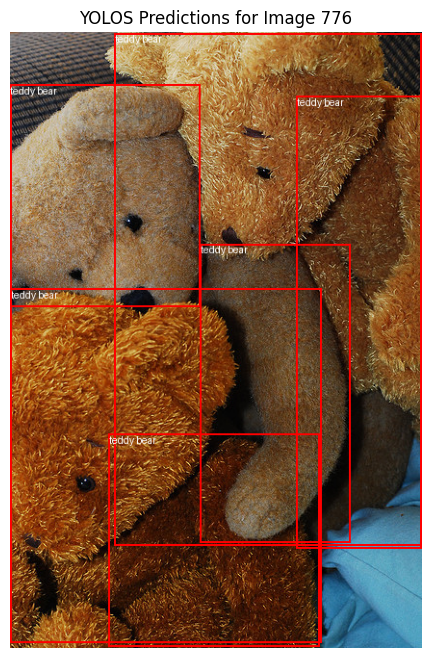

100%|██████████| 630/630 [02:33<00:00,  4.10it/s]


mAP@[0.5:0.95]: tensor(0.3833)
Detailed mAP results: {'map': tensor(0.3833), 'map_50': tensor(0.5586), 'map_75': tensor(0.4092), 'map_small': tensor(0.1196), 'map_medium': tensor(0.3410), 'map_large': tensor(0.5481), 'mar_1': tensor(0.3156), 'mar_10': tensor(0.4545), 'mar_100': tensor(0.4654), 'mar_small': tensor(0.1611), 'mar_medium': tensor(0.4271), 'mar_large': tensor(0.6242), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 1 - Validation mAP Score: 0.3833


map   map_50   map_75  map_small  map_medium  map_large     mar_1  \
0  0.383323  0.55859  0.40922   0.119617    0.341026   0.548114  0.315649   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.454541  0.465405   0.161087    0.427145   0.624188           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3833 at epoch 1


  0%|          | 1/368 [00:02<14:04,  2.30s/it]

Epoch 2, Batch 0: Loss = 0.9943


  3%|▎         | 11/368 [00:48<27:32,  4.63s/it]

Epoch 2, Batch 10: Loss = 1.1032


  6%|▌         | 21/368 [01:28<26:36,  4.60s/it]

Epoch 2, Batch 20: Loss = 0.7512


  8%|▊         | 31/368 [02:10<23:00,  4.10s/it]

Epoch 2, Batch 30: Loss = 0.9475


 11%|█         | 41/368 [02:51<22:49,  4.19s/it]

Epoch 2, Batch 40: Loss = 0.9943


 14%|█▍        | 51/368 [03:30<20:07,  3.81s/it]

Epoch 2, Batch 50: Loss = 1.3883


 17%|█▋        | 61/368 [04:14<19:49,  3.88s/it]

Epoch 2, Batch 60: Loss = 1.2101


 19%|█▉        | 71/368 [04:59<21:58,  4.44s/it]

Epoch 2, Batch 70: Loss = 0.9413


 22%|██▏       | 81/368 [05:38<19:53,  4.16s/it]

Epoch 2, Batch 80: Loss = 1.0440


 25%|██▍       | 91/368 [06:17<19:40,  4.26s/it]

Epoch 2, Batch 90: Loss = 1.3715


 27%|██▋       | 101/368 [07:01<20:38,  4.64s/it]

Epoch 2, Batch 100: Loss = 1.0371


 30%|███       | 111/368 [07:43<17:50,  4.16s/it]

Epoch 2, Batch 110: Loss = 1.1467


 33%|███▎      | 121/368 [08:26<19:39,  4.78s/it]

Epoch 2, Batch 120: Loss = 1.1298


 36%|███▌      | 131/368 [09:11<18:49,  4.77s/it]

Epoch 2, Batch 130: Loss = 1.0581


 38%|███▊      | 141/368 [09:46<11:39,  3.08s/it]

Epoch 2, Batch 140: Loss = 1.2494


 41%|████      | 151/368 [10:29<15:01,  4.15s/it]

Epoch 2, Batch 150: Loss = 1.1096


 44%|████▍     | 161/368 [11:10<15:25,  4.47s/it]

Epoch 2, Batch 160: Loss = 1.3549


 46%|████▋     | 171/368 [11:52<15:19,  4.67s/it]

Epoch 2, Batch 170: Loss = 0.8671


 49%|████▉     | 181/368 [12:37<15:12,  4.88s/it]

Epoch 2, Batch 180: Loss = 0.9335


 52%|█████▏    | 191/368 [13:23<13:06,  4.44s/it]

Epoch 2, Batch 190: Loss = 1.1412


 55%|█████▍    | 201/368 [14:04<10:02,  3.61s/it]

Epoch 2, Batch 200: Loss = 1.0206


 57%|█████▋    | 211/368 [14:47<09:49,  3.75s/it]

Epoch 2, Batch 210: Loss = 0.8584


 60%|██████    | 221/368 [15:29<10:44,  4.38s/it]

Epoch 2, Batch 220: Loss = 0.9305


 63%|██████▎   | 231/368 [16:09<10:15,  4.49s/it]

Epoch 2, Batch 230: Loss = 0.9914


 65%|██████▌   | 241/368 [16:55<10:42,  5.06s/it]

Epoch 2, Batch 240: Loss = 1.1007


 68%|██████▊   | 251/368 [17:36<08:08,  4.18s/it]

Epoch 2, Batch 250: Loss = 0.9630


 71%|███████   | 261/368 [18:26<08:56,  5.01s/it]

Epoch 2, Batch 260: Loss = 0.7131


 74%|███████▎  | 271/368 [19:08<07:01,  4.35s/it]

Epoch 2, Batch 270: Loss = 0.9727


 76%|███████▋  | 281/368 [19:51<05:25,  3.74s/it]

Epoch 2, Batch 280: Loss = 1.1791


 79%|███████▉  | 291/368 [20:37<05:23,  4.20s/it]

Epoch 2, Batch 290: Loss = 1.1659


 82%|████████▏ | 301/368 [21:13<04:14,  3.80s/it]

Epoch 2, Batch 300: Loss = 1.0345


 85%|████████▍ | 311/368 [21:55<04:26,  4.67s/it]

Epoch 2, Batch 310: Loss = 1.1846


 87%|████████▋ | 321/368 [22:45<04:03,  5.18s/it]

Epoch 2, Batch 320: Loss = 0.7988


 90%|████████▉ | 331/368 [23:29<02:19,  3.78s/it]

Epoch 2, Batch 330: Loss = 1.0436


 93%|█████████▎| 341/368 [24:07<01:51,  4.13s/it]

Epoch 2, Batch 340: Loss = 0.8673


 95%|█████████▌| 351/368 [24:52<01:20,  4.72s/it]

Epoch 2, Batch 350: Loss = 1.4875


 98%|█████████▊| 361/368 [25:32<00:32,  4.66s/it]

Epoch 2, Batch 360: Loss = 1.1104


100%|██████████| 368/368 [26:00<00:00,  4.24s/it]


Epoch 2 Complete. Average train Loss: 4.3008, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:11<00:00,  1.21s/it]


Epoch 2 - Validation Loss: 4.2592


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.939 at location [0.98, 266.8, 323.4, 634.98]
Detected teddy bear with confidence 0.862 at location [197.63, 220.35, 353.19, 530.62]
Detected teddy bear with confidence 0.627 at location [297.87, 66.46, 427.95, 536.52]
Detected teddy bear with confidence 0.967 at location [108.98, 1.42, 427.57, 533.93]
Detected teddy bear with confidence 0.985 at location [0.1, 54.62, 197.77, 285.72]
Detected teddy bear with confidence 0.523 at location [102.9, 417.63, 321.21, 638.77]


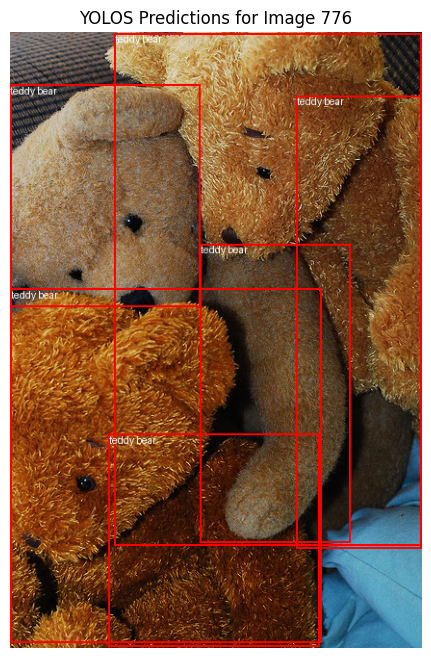

100%|██████████| 630/630 [02:32<00:00,  4.13it/s]


mAP@[0.5:0.95]: tensor(0.3841)
Detailed mAP results: {'map': tensor(0.3841), 'map_50': tensor(0.5598), 'map_75': tensor(0.4110), 'map_small': tensor(0.1214), 'map_medium': tensor(0.3399), 'map_large': tensor(0.5485), 'mar_1': tensor(0.3154), 'mar_10': tensor(0.4558), 'mar_100': tensor(0.4669), 'mar_small': tensor(0.1667), 'mar_medium': tensor(0.4272), 'mar_large': tensor(0.6244), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 2 - Validation mAP Score: 0.3841


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.384081  0.559843  0.411043   0.121378    0.339896    0.54847  0.315441   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.455768  0.466918   0.166749    0.427167    0.62439           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3841 at epoch 2


  0%|          | 1/368 [00:02<16:58,  2.77s/it]

Epoch 3, Batch 0: Loss = 0.8829


  3%|▎         | 11/368 [00:37<21:17,  3.58s/it]

Epoch 3, Batch 10: Loss = 1.1490


  6%|▌         | 21/368 [01:14<22:44,  3.93s/it]

Epoch 3, Batch 20: Loss = 0.9365


  8%|▊         | 31/368 [02:00<25:59,  4.63s/it]

Epoch 3, Batch 30: Loss = 1.0073


 11%|█         | 41/368 [02:37<21:26,  3.94s/it]

Epoch 3, Batch 40: Loss = 0.7848


 14%|█▍        | 51/368 [03:17<17:01,  3.22s/it]

Epoch 3, Batch 50: Loss = 1.3138


 17%|█▋        | 61/368 [04:03<22:27,  4.39s/it]

Epoch 3, Batch 60: Loss = 1.0231


 19%|█▉        | 71/368 [04:52<22:41,  4.59s/it]

Epoch 3, Batch 70: Loss = 1.0844


 22%|██▏       | 81/368 [05:37<21:32,  4.50s/it]

Epoch 3, Batch 80: Loss = 0.9112


 25%|██▍       | 91/368 [06:12<15:32,  3.37s/it]

Epoch 3, Batch 90: Loss = 0.9867


 27%|██▋       | 101/368 [07:01<22:31,  5.06s/it]

Epoch 3, Batch 100: Loss = 1.1951


 30%|███       | 111/368 [07:43<20:34,  4.80s/it]

Epoch 3, Batch 110: Loss = 1.5082


 33%|███▎      | 121/368 [08:26<16:42,  4.06s/it]

Epoch 3, Batch 120: Loss = 0.9127


 36%|███▌      | 131/368 [08:59<14:20,  3.63s/it]

Epoch 3, Batch 130: Loss = 1.0406


 38%|███▊      | 141/368 [09:42<16:40,  4.41s/it]

Epoch 3, Batch 140: Loss = 1.1311


 41%|████      | 151/368 [10:31<16:17,  4.51s/it]

Epoch 3, Batch 150: Loss = 1.0483


 44%|████▍     | 161/368 [11:13<15:04,  4.37s/it]

Epoch 3, Batch 160: Loss = 0.8707


 46%|████▋     | 171/368 [11:59<13:10,  4.01s/it]

Epoch 3, Batch 170: Loss = 0.7875


 49%|████▉     | 181/368 [12:38<12:04,  3.87s/it]

Epoch 3, Batch 180: Loss = 1.3970


 52%|█████▏    | 191/368 [13:16<11:27,  3.88s/it]

Epoch 3, Batch 190: Loss = 1.0413


 55%|█████▍    | 201/368 [14:00<12:16,  4.41s/it]

Epoch 3, Batch 200: Loss = 1.0552


 57%|█████▋    | 211/368 [14:38<09:26,  3.61s/it]

Epoch 3, Batch 210: Loss = 0.9671


 60%|██████    | 221/368 [15:17<09:18,  3.80s/it]

Epoch 3, Batch 220: Loss = 1.0516


 63%|██████▎   | 231/368 [16:09<11:20,  4.97s/it]

Epoch 3, Batch 230: Loss = 1.3223


 65%|██████▌   | 241/368 [16:52<10:17,  4.86s/it]

Epoch 3, Batch 240: Loss = 1.2358


 68%|██████▊   | 251/368 [17:36<09:14,  4.74s/it]

Epoch 3, Batch 250: Loss = 0.8970


 71%|███████   | 261/368 [18:15<07:13,  4.05s/it]

Epoch 3, Batch 260: Loss = 1.0817


 74%|███████▎  | 271/368 [18:54<06:16,  3.88s/it]

Epoch 3, Batch 270: Loss = 1.2841


 76%|███████▋  | 281/368 [19:38<06:57,  4.80s/it]

Epoch 3, Batch 280: Loss = 1.2236


 79%|███████▉  | 291/368 [20:17<04:20,  3.39s/it]

Epoch 3, Batch 290: Loss = 1.2022


 82%|████████▏ | 301/368 [21:00<04:38,  4.16s/it]

Epoch 3, Batch 300: Loss = 0.9632


 85%|████████▍ | 311/368 [21:49<04:39,  4.91s/it]

Epoch 3, Batch 310: Loss = 1.0615


 87%|████████▋ | 321/368 [22:35<03:52,  4.94s/it]

Epoch 3, Batch 320: Loss = 0.9578


 90%|████████▉ | 331/368 [23:19<02:35,  4.20s/it]

Epoch 3, Batch 330: Loss = 1.1425


 93%|█████████▎| 341/368 [24:00<02:21,  5.23s/it]

Epoch 3, Batch 340: Loss = 1.0136


 95%|█████████▌| 351/368 [24:42<01:03,  3.73s/it]

Epoch 3, Batch 350: Loss = 1.1596


 98%|█████████▊| 361/368 [25:27<00:31,  4.49s/it]

Epoch 3, Batch 360: Loss = 1.1828


100%|██████████| 368/368 [25:48<00:00,  4.21s/it]


Epoch 3 Complete. Average train Loss: 4.3080, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:10<00:00,  1.21s/it]


Epoch 3 - Validation Loss: 4.2451


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.94 at location [0.98, 266.73, 323.4, 634.99]
Detected teddy bear with confidence 0.867 at location [197.67, 220.31, 353.19, 530.6]
Detected teddy bear with confidence 0.633 at location [297.9, 66.42, 427.95, 536.53]
Detected teddy bear with confidence 0.967 at location [109.0, 1.42, 427.57, 533.91]
Detected teddy bear with confidence 0.985 at location [0.09, 54.62, 197.75, 285.74]
Detected teddy bear with confidence 0.527 at location [102.9, 417.52, 321.2, 638.78]


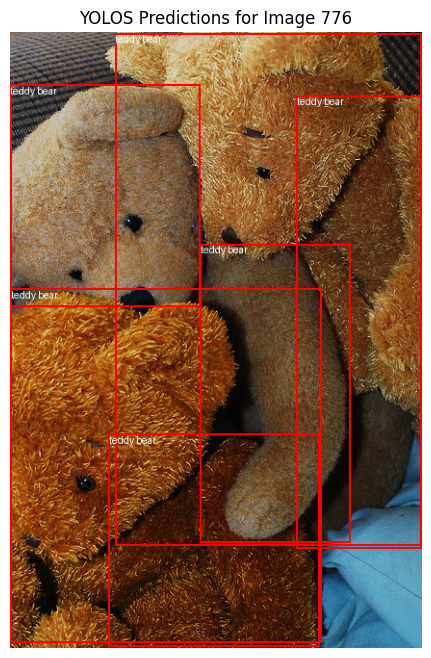

100%|██████████| 630/630 [02:33<00:00,  4.11it/s]


mAP@[0.5:0.95]: tensor(0.3849)
Detailed mAP results: {'map': tensor(0.3849), 'map_50': tensor(0.5604), 'map_75': tensor(0.4121), 'map_small': tensor(0.1222), 'map_medium': tensor(0.3404), 'map_large': tensor(0.5500), 'mar_1': tensor(0.3158), 'mar_10': tensor(0.4568), 'mar_100': tensor(0.4682), 'mar_small': tensor(0.1670), 'mar_medium': tensor(0.4294), 'mar_large': tensor(0.6264), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 3 - Validation mAP Score: 0.3849


map    map_50   map_75  map_small  map_medium  map_large    mar_1  \
0  0.384927  0.560398  0.41213   0.122221    0.340414   0.549968  0.31578   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.456798  0.468248   0.167049    0.429417   0.626404           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3849 at epoch 3


  0%|          | 1/368 [00:05<34:42,  5.68s/it]

Epoch 4, Batch 0: Loss = 1.1640


  3%|▎         | 11/368 [00:47<28:23,  4.77s/it]

Epoch 4, Batch 10: Loss = 1.1980


  6%|▌         | 21/368 [01:33<26:49,  4.64s/it]

Epoch 4, Batch 20: Loss = 0.9154


  8%|▊         | 31/368 [02:13<25:26,  4.53s/it]

Epoch 4, Batch 30: Loss = 0.9290


 11%|█         | 41/368 [02:54<24:34,  4.51s/it]

Epoch 4, Batch 40: Loss = 1.0418


 14%|█▍        | 51/368 [03:39<28:27,  5.38s/it]

Epoch 4, Batch 50: Loss = 1.1061


 17%|█▋        | 61/368 [04:18<19:35,  3.83s/it]

Epoch 4, Batch 60: Loss = 1.1357


 19%|█▉        | 71/368 [04:57<20:28,  4.14s/it]

Epoch 4, Batch 70: Loss = 0.8485


 22%|██▏       | 81/368 [05:38<21:38,  4.52s/it]

Epoch 4, Batch 80: Loss = 0.9885


 25%|██▍       | 91/368 [06:21<18:04,  3.91s/it]

Epoch 4, Batch 90: Loss = 0.9875


 27%|██▋       | 101/368 [07:07<19:32,  4.39s/it]

Epoch 4, Batch 100: Loss = 1.0140


 30%|███       | 111/368 [07:52<18:45,  4.38s/it]

Epoch 4, Batch 110: Loss = 0.9013


 33%|███▎      | 121/368 [08:37<17:02,  4.14s/it]

Epoch 4, Batch 120: Loss = 0.7914


 36%|███▌      | 131/368 [09:19<14:24,  3.65s/it]

Epoch 4, Batch 130: Loss = 1.0447


 38%|███▊      | 141/368 [09:58<15:44,  4.16s/it]

Epoch 4, Batch 140: Loss = 1.0412


 41%|████      | 151/368 [10:43<17:24,  4.82s/it]

Epoch 4, Batch 150: Loss = 1.0836


 44%|████▍     | 161/368 [11:19<11:33,  3.35s/it]

Epoch 4, Batch 160: Loss = 0.9904


 46%|████▋     | 171/368 [12:02<12:19,  3.75s/it]

Epoch 4, Batch 170: Loss = 1.1947


 49%|████▉     | 181/368 [12:46<12:17,  3.94s/it]

Epoch 4, Batch 180: Loss = 0.9155


 52%|█████▏    | 191/368 [13:27<13:37,  4.62s/it]

Epoch 4, Batch 190: Loss = 0.8580


 55%|█████▍    | 201/368 [14:15<13:21,  4.80s/it]

Epoch 4, Batch 200: Loss = 0.9133


 57%|█████▋    | 211/368 [15:04<14:06,  5.39s/it]

Epoch 4, Batch 210: Loss = 1.1498


 60%|██████    | 221/368 [15:42<08:51,  3.61s/it]

Epoch 4, Batch 220: Loss = 1.3007


 63%|██████▎   | 231/368 [16:26<09:36,  4.21s/it]

Epoch 4, Batch 230: Loss = 0.9602


 65%|██████▌   | 241/368 [17:05<09:36,  4.54s/it]

Epoch 4, Batch 240: Loss = 1.0460


 68%|██████▊   | 251/368 [17:49<07:54,  4.05s/it]

Epoch 4, Batch 250: Loss = 1.0286


 71%|███████   | 261/368 [18:30<07:08,  4.00s/it]

Epoch 4, Batch 260: Loss = 0.9999


 74%|███████▎  | 271/368 [19:10<06:15,  3.87s/it]

Epoch 4, Batch 270: Loss = 1.2323


 76%|███████▋  | 281/368 [20:00<08:03,  5.56s/it]

Epoch 4, Batch 280: Loss = 1.0175


 79%|███████▉  | 291/368 [20:48<06:16,  4.89s/it]

Epoch 4, Batch 290: Loss = 1.1196


 82%|████████▏ | 301/368 [21:31<04:43,  4.23s/it]

Epoch 4, Batch 300: Loss = 1.1257


 85%|████████▍ | 311/368 [22:20<04:50,  5.10s/it]

Epoch 4, Batch 310: Loss = 1.0722


 87%|████████▋ | 321/368 [22:53<02:22,  3.03s/it]

Epoch 4, Batch 320: Loss = 0.9356


 90%|████████▉ | 331/368 [23:35<02:43,  4.42s/it]

Epoch 4, Batch 330: Loss = 1.0547


 93%|█████████▎| 341/368 [24:20<01:56,  4.33s/it]

Epoch 4, Batch 340: Loss = 1.4693


 95%|█████████▌| 351/368 [25:00<01:14,  4.40s/it]

Epoch 4, Batch 350: Loss = 1.3400


 98%|█████████▊| 361/368 [25:46<00:30,  4.39s/it]

Epoch 4, Batch 360: Loss = 1.1477


100%|██████████| 368/368 [26:12<00:00,  4.27s/it]


Epoch 4 Complete. Average train Loss: 4.2648, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:10<00:00,  1.21s/it]


Epoch 4 - Validation Loss: 4.2292


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.941 at location [0.98, 266.65, 323.39, 635.0]
Detected teddy bear with confidence 0.871 at location [197.68, 220.25, 353.19, 530.58]
Detected teddy bear with confidence 0.639 at location [297.92, 66.37, 427.95, 536.52]
Detected teddy bear with confidence 0.968 at location [109.01, 1.41, 427.57, 533.87]
Detected teddy bear with confidence 0.985 at location [0.09, 54.62, 197.74, 285.77]
Detected teddy bear with confidence 0.531 at location [102.91, 417.42, 321.19, 638.79]


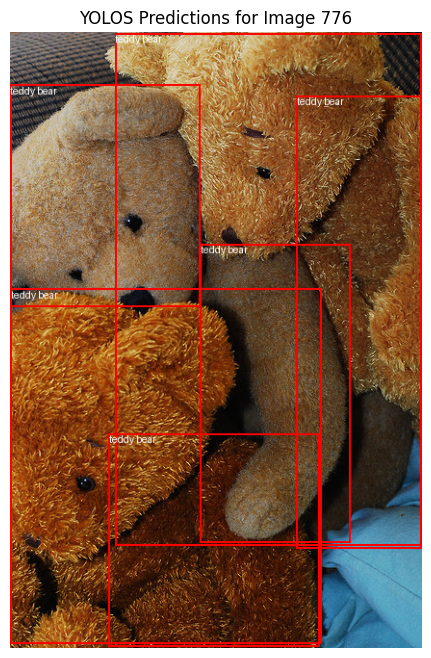

100%|██████████| 630/630 [02:34<00:00,  4.07it/s]


mAP@[0.5:0.95]: tensor(0.3854)
Detailed mAP results: {'map': tensor(0.3854), 'map_50': tensor(0.5616), 'map_75': tensor(0.4124), 'map_small': tensor(0.1227), 'map_medium': tensor(0.3413), 'map_large': tensor(0.5503), 'mar_1': tensor(0.3165), 'mar_10': tensor(0.4573), 'mar_100': tensor(0.4690), 'mar_small': tensor(0.1680), 'mar_medium': tensor(0.4303), 'mar_large': tensor(0.6268), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 4 - Validation mAP Score: 0.3854


map   map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.38539  0.56164  0.412406   0.122711    0.341263   0.550331  0.316473   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.457277  0.469017   0.167952    0.430335   0.626813           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3854 at epoch 4


  0%|          | 1/368 [00:06<41:30,  6.79s/it]

Epoch 5, Batch 0: Loss = 0.9896


  3%|▎         | 11/368 [01:00<34:55,  5.87s/it]

Epoch 5, Batch 10: Loss = 0.8723


  6%|▌         | 21/368 [01:34<19:24,  3.36s/it]

Epoch 5, Batch 20: Loss = 1.2384


  8%|▊         | 31/368 [02:21<29:02,  5.17s/it]

Epoch 5, Batch 30: Loss = 0.7398


 11%|█         | 41/368 [03:02<23:10,  4.25s/it]

Epoch 5, Batch 40: Loss = 0.9995


 14%|█▍        | 51/368 [03:46<24:00,  4.54s/it]

Epoch 5, Batch 50: Loss = 0.9929


 17%|█▋        | 61/368 [04:24<22:11,  4.34s/it]

Epoch 5, Batch 60: Loss = 0.9194


 19%|█▉        | 71/368 [05:07<19:18,  3.90s/it]

Epoch 5, Batch 70: Loss = 1.0314


 22%|██▏       | 81/368 [05:49<19:51,  4.15s/it]

Epoch 5, Batch 80: Loss = 0.8470


 25%|██▍       | 91/368 [06:39<22:38,  4.90s/it]

Epoch 5, Batch 90: Loss = 1.2548


 27%|██▋       | 101/368 [07:24<18:32,  4.17s/it]

Epoch 5, Batch 100: Loss = 1.3494


 30%|███       | 111/368 [08:07<18:41,  4.36s/it]

Epoch 5, Batch 110: Loss = 0.8704


 33%|███▎      | 121/368 [08:53<18:13,  4.43s/it]

Epoch 5, Batch 120: Loss = 0.9347


 36%|███▌      | 131/368 [09:38<18:10,  4.60s/it]

Epoch 5, Batch 130: Loss = 1.0020


 38%|███▊      | 141/368 [10:16<16:01,  4.23s/it]

Epoch 5, Batch 140: Loss = 1.0763


 41%|████      | 151/368 [10:55<16:17,  4.50s/it]

Epoch 5, Batch 150: Loss = 1.2973


 44%|████▍     | 161/368 [11:33<13:50,  4.01s/it]

Epoch 5, Batch 160: Loss = 0.9468


 46%|████▋     | 171/368 [12:14<12:27,  3.80s/it]

Epoch 5, Batch 170: Loss = 1.0560


 49%|████▉     | 181/368 [12:56<14:12,  4.56s/it]

Epoch 5, Batch 180: Loss = 1.0709


 52%|█████▏    | 191/368 [13:35<10:54,  3.70s/it]

Epoch 5, Batch 190: Loss = 1.2635


 55%|█████▍    | 201/368 [14:17<12:26,  4.47s/it]

Epoch 5, Batch 200: Loss = 1.2297


 57%|█████▋    | 211/368 [14:52<08:20,  3.19s/it]

Epoch 5, Batch 210: Loss = 1.1821


 60%|██████    | 221/368 [15:38<11:39,  4.76s/it]

Epoch 5, Batch 220: Loss = 1.1078


 63%|██████▎   | 231/368 [16:17<08:02,  3.52s/it]

Epoch 5, Batch 230: Loss = 1.0148


 65%|██████▌   | 241/368 [16:57<09:01,  4.26s/it]

Epoch 5, Batch 240: Loss = 1.1186


 68%|██████▊   | 251/368 [17:42<07:19,  3.75s/it]

Epoch 5, Batch 250: Loss = 1.0800


 71%|███████   | 261/368 [18:24<07:25,  4.16s/it]

Epoch 5, Batch 260: Loss = 1.1557


 74%|███████▎  | 271/368 [19:06<05:44,  3.55s/it]

Epoch 5, Batch 270: Loss = 1.2264


 76%|███████▋  | 281/368 [19:51<06:12,  4.28s/it]

Epoch 5, Batch 280: Loss = 0.7670


 79%|███████▉  | 291/368 [20:30<05:33,  4.33s/it]

Epoch 5, Batch 290: Loss = 0.7688


 82%|████████▏ | 301/368 [21:16<04:58,  4.45s/it]

Epoch 5, Batch 300: Loss = 0.7415


 85%|████████▍ | 311/368 [21:57<04:03,  4.27s/it]

Epoch 5, Batch 310: Loss = 1.0211


 87%|████████▋ | 321/368 [22:38<03:26,  4.40s/it]

Epoch 5, Batch 320: Loss = 1.3795


 90%|████████▉ | 331/368 [23:19<02:40,  4.34s/it]

Epoch 5, Batch 330: Loss = 0.9056


 93%|█████████▎| 341/368 [23:59<01:36,  3.58s/it]

Epoch 5, Batch 340: Loss = 1.1070


 95%|█████████▌| 351/368 [24:41<01:17,  4.56s/it]

Epoch 5, Batch 350: Loss = 1.1361


 98%|█████████▊| 361/368 [25:19<00:23,  3.39s/it]

Epoch 5, Batch 360: Loss = 1.0771


100%|██████████| 368/368 [25:42<00:00,  4.19s/it]


Epoch 5 Complete. Average train Loss: 4.2606, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:11<00:00,  1.22s/it]


Epoch 5 - Validation Loss: 4.2200


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.941 at location [0.97, 266.61, 323.38, 635.0]
Detected teddy bear with confidence 0.501 at location [303.62, 65.24, 427.72, 413.41]
Detected teddy bear with confidence 0.873 at location [197.71, 220.23, 353.18, 530.58]
Detected teddy bear with confidence 0.642 at location [297.94, 66.34, 427.96, 536.53]
Detected teddy bear with confidence 0.968 at location [109.02, 1.41, 427.57, 533.86]
Detected teddy bear with confidence 0.985 at location [0.09, 54.61, 197.72, 285.78]
Detected teddy bear with confidence 0.533 at location [102.91, 417.37, 321.19, 638.79]


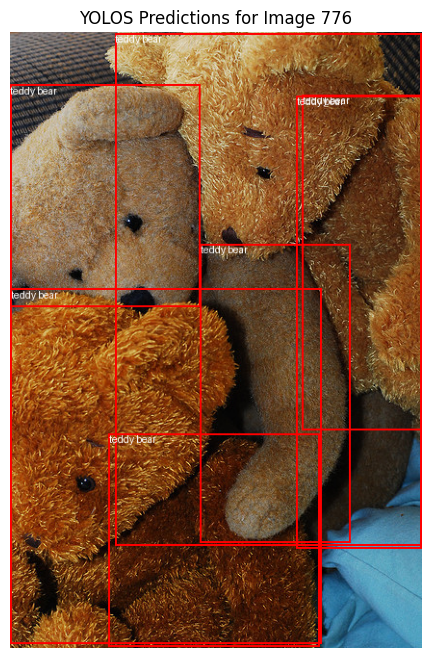

100%|██████████| 630/630 [02:33<00:00,  4.11it/s]


mAP@[0.5:0.95]: tensor(0.3857)
Detailed mAP results: {'map': tensor(0.3857), 'map_50': tensor(0.5619), 'map_75': tensor(0.4130), 'map_small': tensor(0.1230), 'map_medium': tensor(0.3416), 'map_large': tensor(0.5503), 'mar_1': tensor(0.3169), 'mar_10': tensor(0.4583), 'mar_100': tensor(0.4697), 'mar_small': tensor(0.1682), 'mar_medium': tensor(0.4305), 'mar_large': tensor(0.6277), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 5 - Validation mAP Score: 0.3857


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.385684  0.561939  0.413003   0.123037    0.341585   0.550337  0.316892   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.458329  0.469687   0.168205     0.43047   0.627691           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3857 at epoch 5


  0%|          | 1/368 [00:05<34:21,  5.62s/it]

Epoch 6, Batch 0: Loss = 1.0330


  3%|▎         | 11/368 [00:51<26:42,  4.49s/it]

Epoch 6, Batch 10: Loss = 1.1976


  6%|▌         | 21/368 [01:32<24:11,  4.18s/it]

Epoch 6, Batch 20: Loss = 1.1471


  8%|▊         | 31/368 [02:19<25:04,  4.46s/it]

Epoch 6, Batch 30: Loss = 1.0934


 11%|█         | 41/368 [03:10<29:09,  5.35s/it]

Epoch 6, Batch 40: Loss = 0.9768


 14%|█▍        | 51/368 [04:00<26:06,  4.94s/it]

Epoch 6, Batch 50: Loss = 0.9292


 17%|█▋        | 61/368 [04:35<19:24,  3.79s/it]

Epoch 6, Batch 60: Loss = 1.0933


 19%|█▉        | 71/368 [05:15<17:06,  3.46s/it]

Epoch 6, Batch 70: Loss = 1.2971


 22%|██▏       | 81/368 [05:54<18:01,  3.77s/it]

Epoch 6, Batch 80: Loss = 1.0291


 25%|██▍       | 91/368 [06:36<20:07,  4.36s/it]

Epoch 6, Batch 90: Loss = 1.3289


 27%|██▋       | 101/368 [07:20<17:42,  3.98s/it]

Epoch 6, Batch 100: Loss = 1.2045


 30%|███       | 111/368 [08:02<17:11,  4.01s/it]

Epoch 6, Batch 110: Loss = 1.3036


 33%|███▎      | 121/368 [08:50<19:58,  4.85s/it]

Epoch 6, Batch 120: Loss = 1.0741


 36%|███▌      | 131/368 [09:37<18:18,  4.63s/it]

Epoch 6, Batch 130: Loss = 1.1487


 38%|███▊      | 141/368 [10:17<16:02,  4.24s/it]

Epoch 6, Batch 140: Loss = 1.0278


 41%|████      | 151/368 [10:55<14:33,  4.03s/it]

Epoch 6, Batch 150: Loss = 1.0670


 44%|████▍     | 161/368 [11:37<16:10,  4.69s/it]

Epoch 6, Batch 160: Loss = 1.6783


 46%|████▋     | 171/368 [12:17<14:16,  4.35s/it]

Epoch 6, Batch 170: Loss = 1.0092


 49%|████▉     | 181/368 [13:02<14:20,  4.60s/it]

Epoch 6, Batch 180: Loss = 0.9793


 52%|█████▏    | 191/368 [13:46<14:30,  4.92s/it]

Epoch 6, Batch 190: Loss = 1.1093


 55%|█████▍    | 201/368 [14:26<12:24,  4.46s/it]

Epoch 6, Batch 200: Loss = 0.9941


 57%|█████▋    | 211/368 [15:03<10:00,  3.83s/it]

Epoch 6, Batch 210: Loss = 0.9764


 60%|██████    | 221/368 [15:51<10:52,  4.44s/it]

Epoch 6, Batch 220: Loss = 0.9694


 63%|██████▎   | 231/368 [16:40<11:17,  4.94s/it]

Epoch 6, Batch 230: Loss = 1.0950


 65%|██████▌   | 241/368 [17:14<07:15,  3.43s/it]

Epoch 6, Batch 240: Loss = 0.7825


 68%|██████▊   | 251/368 [17:56<07:41,  3.94s/it]

Epoch 6, Batch 250: Loss = 0.8631


 71%|███████   | 261/368 [18:46<08:32,  4.79s/it]

Epoch 6, Batch 260: Loss = 1.1179


 74%|███████▎  | 271/368 [19:23<06:12,  3.84s/it]

Epoch 6, Batch 270: Loss = 0.9889


 76%|███████▋  | 281/368 [20:09<06:24,  4.42s/it]

Epoch 6, Batch 280: Loss = 0.9555


 79%|███████▉  | 291/368 [20:51<04:44,  3.69s/it]

Epoch 6, Batch 290: Loss = 1.0044


 82%|████████▏ | 301/368 [21:30<04:07,  3.70s/it]

Epoch 6, Batch 300: Loss = 1.1374


 85%|████████▍ | 311/368 [22:15<04:15,  4.48s/it]

Epoch 6, Batch 310: Loss = 0.9040


 87%|████████▋ | 321/368 [22:55<03:03,  3.91s/it]

Epoch 6, Batch 320: Loss = 0.8637


 90%|████████▉ | 331/368 [23:37<02:41,  4.37s/it]

Epoch 6, Batch 330: Loss = 0.9394


 93%|█████████▎| 341/368 [24:14<01:33,  3.45s/it]

Epoch 6, Batch 340: Loss = 1.1048


 95%|█████████▌| 351/368 [24:59<01:17,  4.57s/it]

Epoch 6, Batch 350: Loss = 1.0552


 98%|█████████▊| 361/368 [25:43<00:29,  4.28s/it]

Epoch 6, Batch 360: Loss = 1.2575


100%|██████████| 368/368 [26:09<00:00,  4.26s/it]


Epoch 6 Complete. Average train Loss: 4.2375, Skipped Batches: 0


Validating: 100%|██████████| 158/158 [03:10<00:00,  1.21s/it]


Epoch 6 - Validation Loss: 4.2104


  0%|          | 0/630 [00:00<?, ?it/s]

Detected teddy bear with confidence 0.942 at location [0.97, 266.58, 323.38, 635.01]
Detected teddy bear with confidence 0.507 at location [303.63, 65.23, 427.72, 413.44]
Detected teddy bear with confidence 0.876 at location [197.72, 220.2, 353.18, 530.57]
Detected teddy bear with confidence 0.645 at location [297.96, 66.32, 427.96, 536.55]
Detected teddy bear with confidence 0.968 at location [109.03, 1.41, 427.58, 533.85]
Detected teddy bear with confidence 0.985 at location [0.08, 54.61, 197.71, 285.8]
Detected teddy bear with confidence 0.535 at location [102.92, 417.31, 321.18, 638.79]


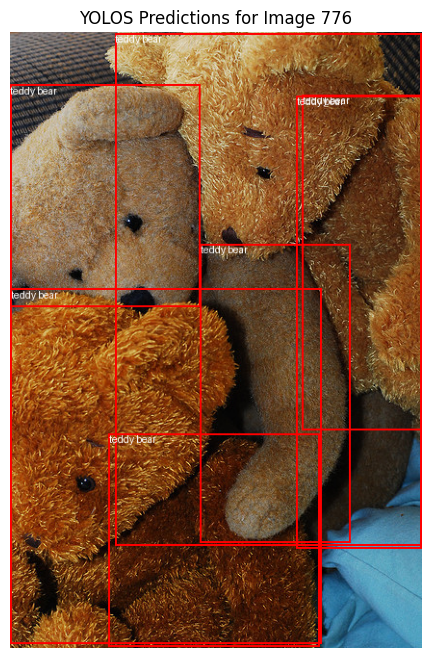

100%|██████████| 630/630 [02:32<00:00,  4.12it/s]


mAP@[0.5:0.95]: tensor(0.3857)
Detailed mAP results: {'map': tensor(0.3857), 'map_50': tensor(0.5619), 'map_75': tensor(0.4133), 'map_small': tensor(0.1232), 'map_medium': tensor(0.3413), 'map_large': tensor(0.5506), 'mar_1': tensor(0.3166), 'mar_10': tensor(0.4585), 'mar_100': tensor(0.4701), 'mar_small': tensor(0.1689), 'mar_medium': tensor(0.4317), 'mar_large': tensor(0.6277), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Epoch 6 - Validation mAP Score: 0.3857


map    map_50    map_75  map_small  map_medium  map_large     mar_1  \
0  0.385686  0.561913  0.413326    0.12317    0.341326   0.550626  0.316641   

    mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.45851  0.470056   0.168909    0.431673   0.627653           -1.0   

   mar_100_per_class  
0               -1.0

Best model saved with mAP 0.3857 at epoch 6
Early stopping triggered - Training Stopped!


In [ ]:
# Train Setting
epochs = 10
optimizer = torch.optim.AdamW(lokr_parameters, lr=3e-5, betas=(0.9, 0.98), eps=1e-8, weight_decay=5e-3)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2, threshold=0.001, verbose=True)
early_stopping = EarlyStopping(patience=3)

# Train the LoKr model
best_mAP_score_LoKr, epochs_list_LoKr, train_total_losses_LoKr, val_total_losses_LoKr, train_focal_losses_LoKr, train_bbox_losses_LoKr, train_giou_losses_LoKr, mAP_scores_LoKr = train_model(
    model_with_LoKr, processor, train_dataloader, val_dataloader, optimizer, scheduler, early_stopping, device, "lokr_model.pth", epochs=epochs, is_plateau_scheduler=True
)

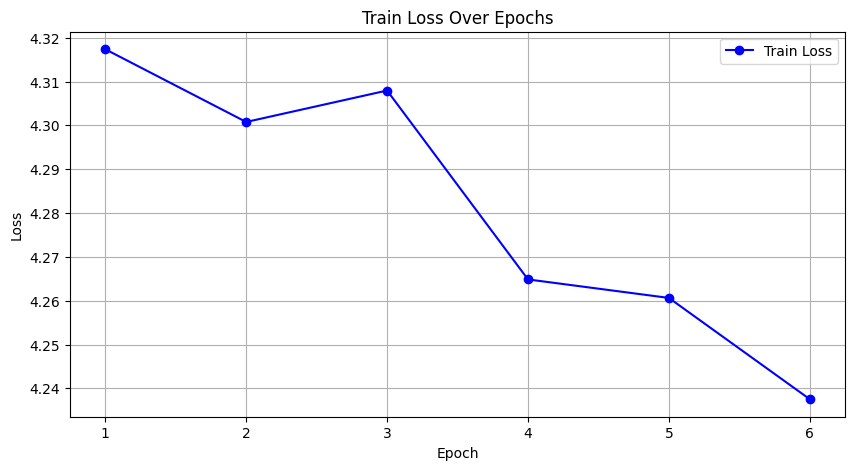

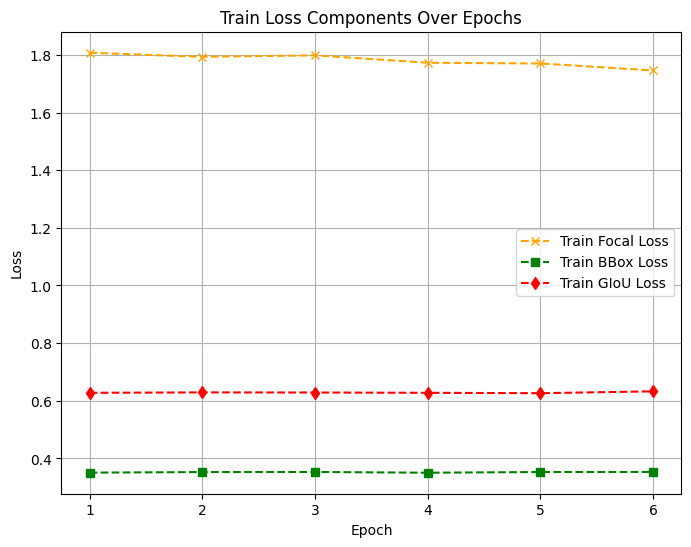

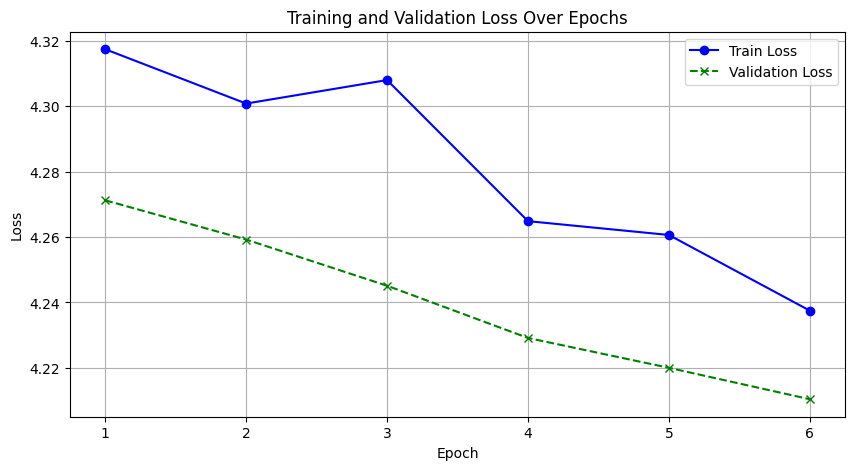

In [ ]:
plot_loss_graphs(epochs_list_LoKr, train_total_losses_LoKr, train_focal_losses_LoKr, train_bbox_losses_LoKr, train_giou_losses_LoKr, val_total_losses_LoKr)


In [ ]:
# Load the saved model
model_with_LoKr = torch.load("lokr_model.pth", map_location=torch.device("cuda" if torch.cuda.is_available() else "cpu"))
print(model_with_LoKr.peft_config)

# Check which weights have been updated
for name, param in model_with_LoKr.named_parameters():
    if param.requires_grad:
        print(f"{name} Trainable (Updated)")
    else:
        print(f"{name} Frozen (Original)")

print(model_with_LoKr)

{'default': LoKrConfig(task_type=None, peft_type=<PeftType.LOKR: 'LOKR'>, auto_mapping=None, base_model_name_or_path='hustvl/yolos-small', revision=None, inference_mode=False, rank_pattern={}, alpha_pattern={}, r=8, alpha=16, rank_dropout=0.3, module_dropout=0.1, use_effective_conv2d=True, decompose_both=True, decompose_factor=8, rank_dropout_scale=False, target_modules={'query', 'value'}, exclude_modules=None, init_weights=True, layers_to_transform=None, layers_pattern=None, modules_to_save=None)}
base_model.model.vit.embeddings.cls_token Frozen (Original)
base_model.model.vit.embeddings.detection_tokens Frozen (Original)
base_model.model.vit.embeddings.position_embeddings Frozen (Original)
base_model.model.vit.embeddings.patch_embeddings.projection.weight Frozen (Original)
base_model.model.vit.embeddings.patch_embeddings.projection.bias Frozen (Original)
base_model.model.vit.encoder.mid_position_embeddings Frozen (Original)
base_model.model.vit.encoder.layer.0.attention.attention.que

<ipython-input-33-eda502634a67>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_with_LoKr = torch.load("lokr_model.pth", map_location=torch.device("cuda" if torch.cud

In [ ]:
# Mean value of LoKr layers after training
for name, param in model_with_LoKr.named_parameters():
    if "lokr" in name:
        print(f"{name} mean after training: {param.data.mean().item():.6f}")


base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w1.default mean after training: -0.000054
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w2_a.default mean after training: -0.020677
base_model.model.vit.encoder.layer.0.attention.attention.query.lokr_w2_b.default mean after training: -0.002292
base_model.model.vit.encoder.layer.0.attention.attention.value.lokr_w1.default mean after training: 0.000109
base_model.model.vit.encoder.layer.0.attention.attention.value.lokr_w2_a.default mean after training: -0.002589
base_model.model.vit.encoder.layer.0.attention.attention.value.lokr_w2_b.default mean after training: 0.004135
base_model.model.vit.encoder.layer.1.attention.attention.query.lokr_w1.default mean after training: 0.000024
base_model.model.vit.encoder.layer.1.attention.attention.query.lokr_w2_a.default mean after training: 0.004398
base_model.model.vit.encoder.layer.1.attention.attention.query.lokr_w2_b.default mean after training: -0.004626
ba

#### **Evaluate Model with LoKr**

0it [00:00, ?it/s]

Detected sports ball with confidence 1.0 at location [49.75, 193.47, 188.66, 328.18]
Detected person with confidence 0.879 at location [138.62, 22.34, 462.26, 475.69]
Detected person with confidence 0.998 at location [425.26, 29.36, 618.9, 477.06]
Detected person with confidence 0.998 at location [16.62, 21.51, 461.08, 474.91]


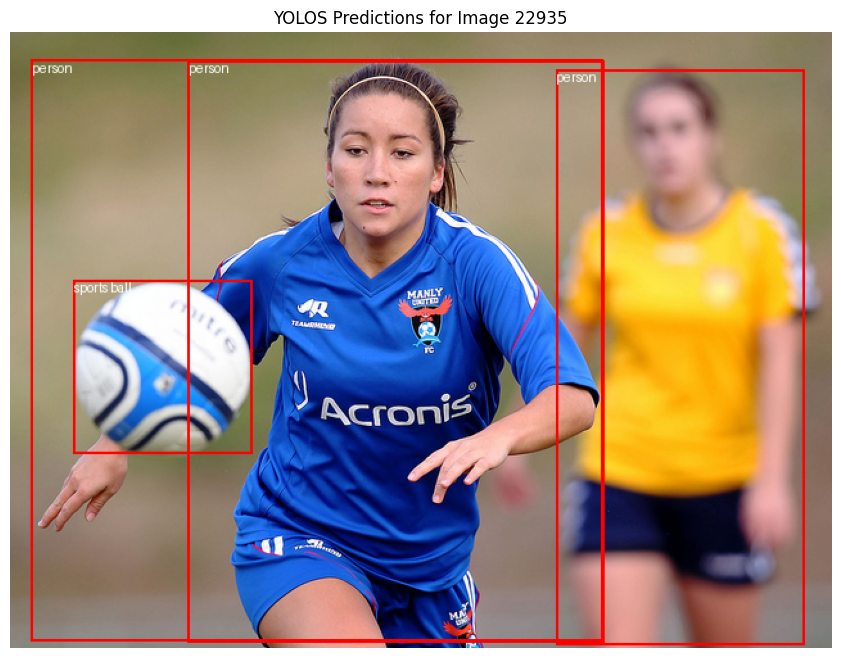

900it [03:51,  3.89it/s]


mAP@[0.5:0.95]: tensor(0.3333)
Detailed mAP results: {'map': tensor(0.3333), 'map_50': tensor(0.5143), 'map_75': tensor(0.3455), 'map_small': tensor(0.0985), 'map_medium': tensor(0.3184), 'map_large': tensor(0.5112), 'mar_1': tensor(0.2830), 'mar_10': tensor(0.4145), 'mar_100': tensor(0.4259), 'mar_small': tensor(0.1512), 'mar_medium': tensor(0.4034), 'mar_large': tensor(0.5970), 'map_per_class': tensor(-1.), 'mar_100_per_class': tensor(-1.), 'classes': tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
        54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71,
        72, 73, 74, 75, 76, 77, 78, 79], dtype=torch.int32)}
Model with LoKr Performance (mAP): {'map': tensor(0.3333), 'map_50': tensor(0.5143), 'map_75': tensor(0.3455), 'map_small': tensor(0.0985), 'map_medium': tensor(

map    map_50    map_75  map_small  map_medium  map_large    mar_1  \
0  0.333272  0.514323  0.345513   0.098507    0.318417   0.511198  0.28298   

     mar_10   mar_100  mar_small  mar_medium  mar_large  map_per_class  \
0  0.414508  0.425934   0.151241    0.403429   0.597001           -1.0   

   mar_100_per_class  
0               -1.0

In [ ]:
model_with_LoKr_results = evaluate_model(model_with_LoKr, processor, test_dataset, yolos_categories)
print("Model with LoKr Performance (mAP):", model_with_LoKr_results)

model_with_LoKr_results_dict = {
    key: value.item() if isinstance(value, torch.Tensor) else value
    for key, value in model_with_LoKr_results.items()
    if key != "classes"
}
model_with_LoKr_results_df = pd.DataFrame([model_with_LoKr_results_dict])
print("Model with LoKr Performance (mAP):")
print(model_with_LoKr_results_df)
display(model_with_LoKr_results_df)
